<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/CenterNet_Keypoint_Triplets_for_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CenterNet: Keypoint Triplets for Object Detection**

논문 링크: https://arxiv.org/abs/1904.08189

CornerNet은 두 쌍의 keypoints로 bbox를 예측하기 때문에 anchor box를 설계할 필요가 없다. 뿐만아니라 성능면에서도 CornerNet의 정확도가 뛰어나기 때문에 one-stage detector 중에서 SOTA 성능을 달성했다.

본 논문은 CenterNet이라는 논문으로, **CenterNet은 CornerNet의 단점을 개선**하고자 나온 논문이다. 그렇다면 CornerNet에는 어떠한 단점들이 있을까?

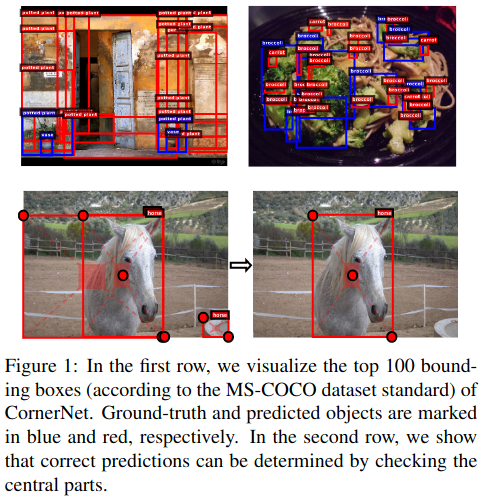

CornerNet의 단점은 아래와 같다.
1. 두 쌍의 keypoints만 사용하기 때문에 **object의 global information을 사용하는 것에 대해 제한**되어 있다.
2. bbox의 boundary를 예측하는 데에만 집중하기 때문에, **어느 keypoint가 연결되어야 하는지에 대한 정보가 부족**하다.

위의 그림 Figure 1에서 엄첨 많은 수의 incorrect bbox가 생성되는 이유도 위에서 말한 단점들 때문이다.

이러한 문제점들을 해결하기 위해 나온 것이 앞서 말한 CenterNet이다.

## **CenterNet**

CenterNet은 **두 쌍의 keypoints가 생성한 region에서 center keypoint 정보를 활용**한다. 만일 예측된 bbox가 GT box와 높은 IoU를 가진다면, 예측된 box의 중앙 구역에 존재하는 center keypoint는 GT와 동일한 class를 가질 확률이 높다.

이를 활용해 **두 쌍의 keypoints로 예측한 bbox의 center point가 실제 GT와 동일한 class인지를 확인**한다.

이렇게 center keypoints를 활용하는 방법으로 CornerNet이 생성하는 incorrect bbox의 비율을 감소 시킨다.

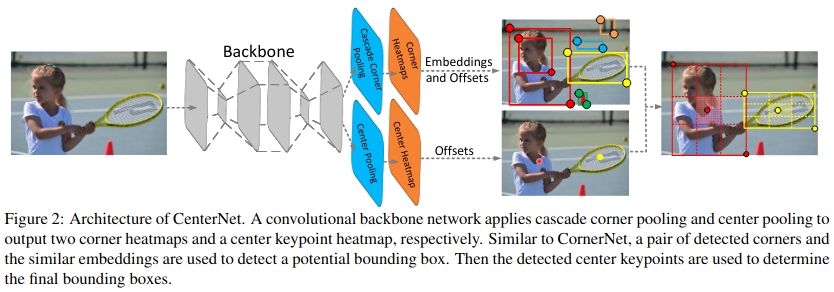

위의 그림 Figure 2는 CenterNet의 구조이다. Backbone이 생성한 feature map에 대해 **Cascade Corner pooling으로 top-left와 bottom-right의 keypoints를 찾아내고, Center pooling은 center keypoint를 찾아낸다**.

### **CenterNet Algorithm**

CenterNet은 총 3개의 keypoints(top-left, bottom-right, center)를 활용하는데, center keypoint를 예측하기 위해 CornerNet에서 center keypoints에 대한 heatmap과 offset를 예측한다.

Center의 동작 원리를 설명하자면 아래와 같다.
1. score가 높은 k개의 center keypoint를 선택한다.
2. center keypoint를 input image에 mapping하기 위해 offset을 사용한다.
3. 두 쌍의 keypoints로 생성된 bbox의 center region을 지정한다.
4. 지정된 central region에 center keypoint가 있는지 확인한다.
5. 만일
- center keypoint가 GT class와 동일하고 central region에 존재하지 않는다면 bbox를 보존
- center keypoint가 center region에 존재하지 않거나, class가 동일하지 않는다면 해당 bbox를 삭제
6. bbox의 score는 세 keypoints의 score의 평군으로 대체된다.

그렇다면 center region은 어떻게 정의를 할까?

만일,
- central region을 작게 설정할시 작은 object에 대한 recall이 낮아진다.
- central region을 크게 설정할시 큰 object에 대한 recall이 낮아진다.

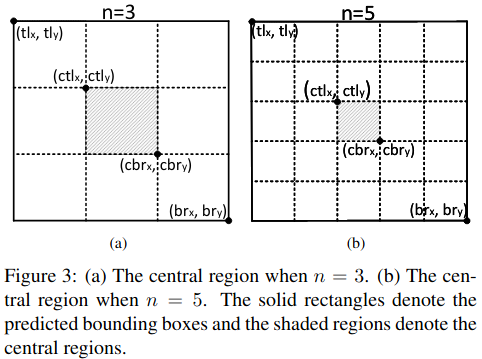

CenterNet을 이를 해결하기 위해 **scale-aware central region**이라는 방법을 사용한다. 간단하게 설명하자면, 큰 object에 대해서는 작은 central region를 지정하고 반대로 작은 object에 대해서는 큰 central region을 지정한다.

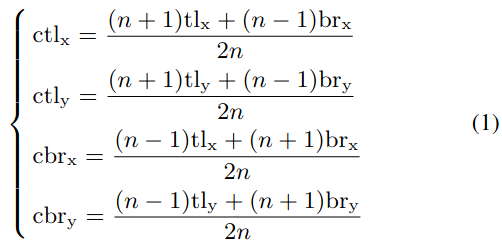

위의 식이 바로 central region의 keypoint이다.
- tl_x, tl_y: 좌측 상단 특징점의 x,y 좌표

- br_x, br_y: 우측 하단 특징점의 x,y 좌표

- ctl_x, ctl_y: 중심 구역의 좌측 상단 특징점 x,y 좌표

- cbr_x, cbr_y: 중심 구역의 우측 하단 특징점 x,y 좌표

- n: 중심 구역의 크기를 결정하는 수. 논문에서는 3과 5를 사용합니다.

### **Center Pooling & Cascade Corner Pooling**

다음으로는 Center pooling과 Cascade Corner pooling에 대해 살펴보겠다.

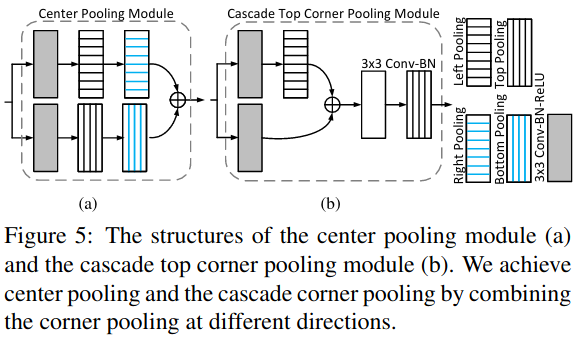

#### **Center Pooling**

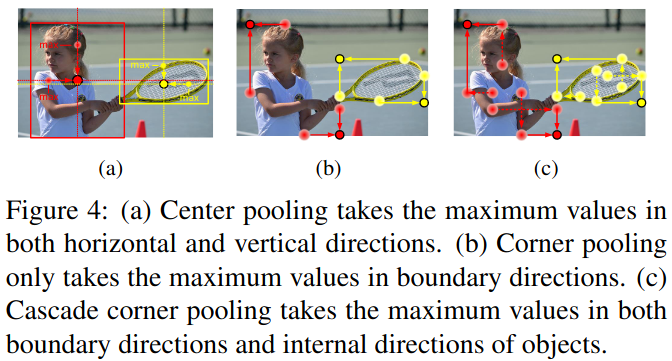

먼저, center pooling은 더욱 풍부한 visual pattern을 활용해 center keypoint를 찾기 위해 사용된다. 위의 그림 Figure 4에서 (a) 부분과 같이 backbone이 생성한 feature map에 존재하는 center keypoint를 찾기 위해 **수평 / 수직 방향의 max 값을 탐색해 다 더해**준다.

#### **Cascade Corner Pooling**

Cascade corner pooling은 top-left, bottom-right의 keypoint를 찾는 방법이며, CornerNet에서 사용했던 Corner pooling을 개선한 것이다. 위의 그림 Figure 4에서 (b) 부분과 (c) 부분이 각각 CornerNet과 CenterNet이다. CornerNet에서는 pixel의 max값만 사용했다면, CenterNet에서는 object boundary의 안쪽 정보까지 활용한다.

object boundary의 max값과 boundary 안쪽의 max값까지 다 더해 keypoints를 찾는다.

## **Experiments**

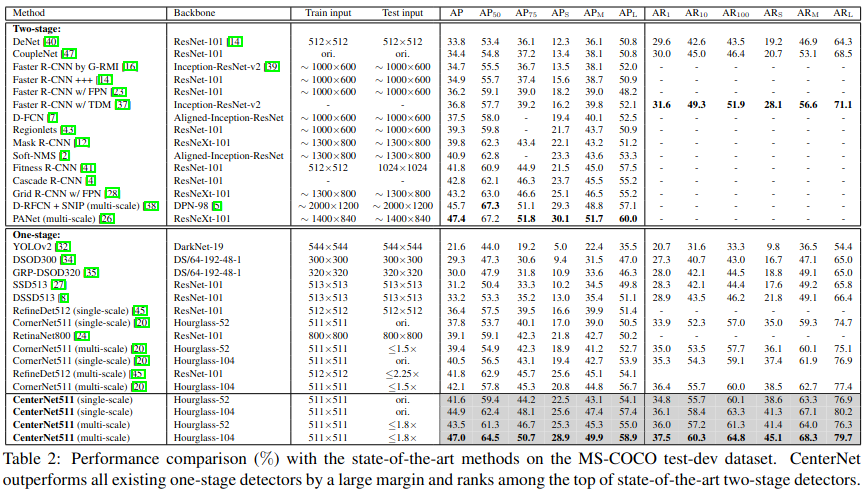

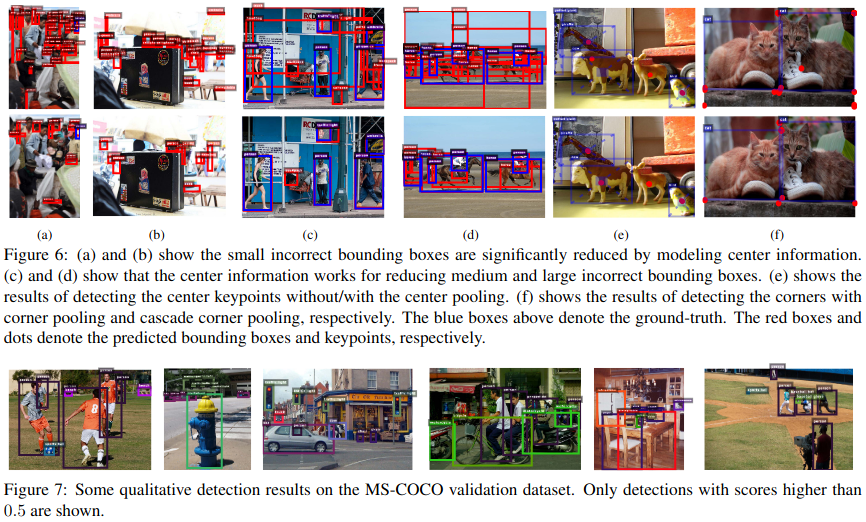